The distribution of temperature $u(t, x)$ at a depth $x$ and a time $t$ is given by the Heat equation:
$$\frac{\partial u}{\partial t}=\kappa \frac{\partial^{2} u}{\partial x^{2}} \quad x\ge 0, \quad t\ge0$$

a) Use the backward (implicit Euler) difference scheme for (1),let
$$
x_j = j \Delta x ,t_n = n \Delta t,j =  0,1,2,\cdots M, n = 0,1,2,\cdots
$$
Let $u_j^n \approx u(x_j,t_n)$ denote the approximate solutions. 

Finite differences approximations to the partial derivatives at the grid point
$x_j,t_n$  are

$$
\begin{aligned} 
\frac{\partial^{2} u}{\partial x^{2}} \left(x_{j}, t_{n}\right) & = \frac{u_{j-1}^n-2 u_{j}^n+u_{j+1}^n}{\Delta x^{2}} + \mathcal{O}(\Delta x^2) \\
\frac{\partial u}{\partial t} \left(x_{j}, t_{n}\right) & =  \frac{u_{j}^n-u_{j}^{n-1}}{\Delta t} + \mathcal{O}(\Delta t)\end{aligned}
$$


Nelgecting $\mathcal{O}(\Delta x^2),\mathcal{O}(\Delta t)$ and then plugging these approximations into the wave equation at the point
$x_j,t_n$, we get
$$
 \frac{u_{j}^n-u_{j}^{n-1}}{\Delta t} = \kappa \frac{u_{j-1}^n-2 u_{j}^n+u_{j+1}^n}{\Delta x^{2}}
$$

Simplify it,we can set $\alpha = \kappa \frac{\Delta x^2}{\Delta t^{2}}$, then
$$\alpha u_{j-1}^{n}-(1+2\alpha) p_{j}^{n}+ \alpha p_{j}^{n} =  -u_{j}^{n-1},j = 1,2,\cdots J,n = 1,2,\cdots$$

For the left boundary and rigth boundary are 
$$u_0^n = u(0,t_n),u_J^n = 0$$
Where $J$ is enough large so that right-end boundary condition $u = 0$ can be used.

And the local trunction error is
$$e_j^n =\frac{u_{j}^n-u_{j}^{n-1}}{\Delta t} - \kappa \frac{u_{j-1}^n-2 u_{j}^n+u_{j+1}^n}{\Delta x^{2}} =\frac{\partial u}{\partial t}- \kappa \frac{\partial^2 u}{\partial t^2}+\mathcal{O}(\Delta x^2) +\mathcal{O}(\Delta t)= \mathcal{O}(\Delta x^2,\Delta t)$$

Now if $\Delta x \rightarrow 0,\Delta t \rightarrow 0$, $e_j^n \rightarrow 0$,so the he backward (implicit Euler) difference scheme for (1) is consistent.

Since through a von Neumann stability analysis,the solution can be seen as a sum of eigenmodes which at each grid point have the form 
$u_{j}^{n}=\lambda^{n} e^{i j k \Delta x }$
substiute the discrete equaion,we can  get
$$\lambda(2\alpha \cos(2k \Delta x)-(1+2\alpha ))  =  -1$$
We can solve the equation
$$\lambda  = \frac{1}{-2\alpha \cos(2k \Delta x)+(1+2\alpha )}$$
Clearly $-2\alpha \cos(2k \Delta x)+(1+2\alpha )>1$, then $|\lambda|<1$, so the method is unconditionally stable.

And the order of the scheme is first order in time and second order in space.

(b) Implement the backward difference scheme to find a numerical approximation to
(1) for $t = 0.25 Y$ to $t = 3.25Y$ with $\Delta x = 0.01$ and $\Delta t = 0.01$. Plot the numerical solution at several times.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def solveheat(A,dt,dx,t0,tf,xmax):

    # define paramters
    k = 2*10**(-7)*3.15*10**7
    q1 = 0.71
    u0t = lambda t:A*np.sin(2*np.pi*t)
    u0x = lambda x:u0t(t0)*np.exp(-q1*x)

    # mesh
    r = k*dt/dx**2
    M = int(xmax/dx)
    N = int((tf-t0)/dt)
    t = np.linspace(t0,tf,N+1)
    x = np.linspace(0,xmax,M+1)
    u = np.zeros((N+1,M+1))
    u[0,:] = u0x(x)
    
    # iteration matrix
    LHS = -(1+2*r)*np.eye(M-1)+r*np.eye(M-1,k=1)+r*np.eye(M-1,k=-1)

    # iterations
    for n in range(N):
        u[n+1,0] = u0t(t[n+1])
        b = -u[n,1:-1]
        b[0] = b[0]-r*u[n,0]
        u[n+1,1:-1] = np.linalg.solve(LHS,b)
    return t,x,u
  
    
# define the problem    
dt = 0.01
dx = 0.01
t0 = 0.25
tf = 0.25+3
A = 1
xmax = 10

# solve
t,x,u = solveheat(A,dt,dx,t0,tf,xmax)


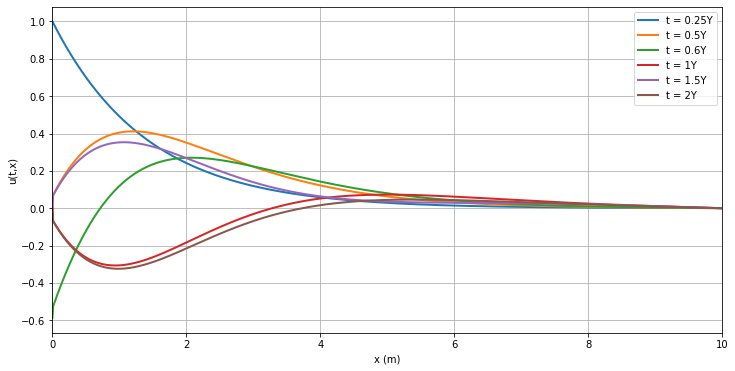

In [6]:
tvs = [0.25,0.5,0.6,1,1.5,2];
plt.figure(figsize = (12,6))
for tv in tvs:
    plt.plot(x,u[int((tv-t0)/dt),:],linewidth = 2,label = 't = '+str(tv)+'Y')
plt.xlim([0,xmax])
plt.xlabel('x (m)')
plt.ylabel('u(t,x)')
plt.grid()
plt.legend()
plt.show()

c) From your numerical solution, find  the depth $x^∗$ at which the temperature is opposite in phase to the surface temperature. 

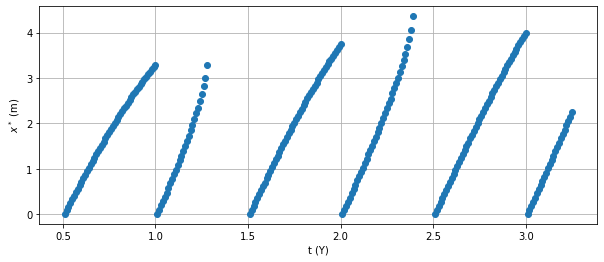

In [7]:
xstar = []
for n in range(len(t)):
    for j  in range(len(x)):
        if u[n,j]*u[n,0]<0:
            xstar.append([t[n],x[j]])
            break
xstar = np.array(xstar)
plt.figure(figsize = (10,4))
plt.plot(xstar[:,0],xstar[:,1],'o')
plt.xlabel('t (Y)')
plt.ylabel('$x^*$ (m)')
plt.grid()
plt.show()